<a href="https://colab.research.google.com/github/mwaoh/Twitter-Sentiment-Analysis/blob/main/Twitter_Word_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#Getting packages and libraries to use

In [217]:
import io
import os
import re

import warnings
warnings.filterwarnings('ignore')

# DataFrame
import numpy as np
import pandas as pd

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn import metrics

# Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# word cloud
from wordcloud import WordCloud

# Word2vec
import gensim

In [218]:
!pip3 install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [219]:
!pip3 install snscrape
# Importing necessary libraries
import snscrape.modules.twitter as sntwitter
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing dataset

In [242]:
import pandas as pd
 
df = pd.read_csv("/Twitter_Data.csv")
print(df)



                                               clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]


#Explaratory Data Analysis

In [243]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


#Data Preprocessing 


In [245]:
# Removing the unnecessary columns.
dataset = df[['clean_text','category']]

In [223]:
dataset.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [246]:
dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [247]:
df['category'].mask(df['category'] == -1,'negative',  inplace=True)
df['category'].mask(df['category'] == 0,'neutral',  inplace=True)
df['category'].mask(df['category'] == 1,'positive',  inplace=True)

#Explaratory Data Analysis
#Visualization

In [248]:
dist = df['category'].value_counts()
import plotly.graph_objects as go
def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()
ditribution_plot(x= dist.index, y= dist.values, name= 'Words Sentiment Distribution')

In [249]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [251]:
df['clean_text'].value_counts()

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples                   1
according assam bjp candidate palab lushan das above years age india should get retired from politics also according him modi also takes retired and added that young generation should come for works                               1
lok sabha election 2019 live modi has ignored his own constituency varanasi says priyanka gandhi                                                                                                                                     1
arnab asks modi about opposition saying asat announcement was violation poll code modi says that government can power can make mistakes but congress who has been power for long time should have considered these allegations       1
mrintelligent was claiming that they have attached more than what its worth 

In [255]:
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive


In [258]:
# Separating positive and negative rows
df_pos = df[df['category'] == 4]
df_neg = df[df['category'] == 0]
print(len(df_pos), len(df_neg))

0 0


In [259]:
df.category.unique()

array(['negative', 'neutral', 'positive', nan], dtype=object)

In [260]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [261]:
df= df.dropna()

In [262]:
df.duplicated().sum()

0

In [263]:
df['category'].value_counts()

positive    72249
neutral     55211
negative    35509
Name: category, dtype: int64

In [281]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"category")

,Total,Percentage
1,72249,44.33
0,55211,33.88
-1,35509,21.79


In [293]:
# Importing Packages
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import urllib.request
import re
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from gensim.models import Word2Vec
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Input,SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow import keras
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE


In [296]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
# Function to Create Wordcloud
def create_wordcloud(text,path):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    random_state=42,
    width=900, height=500,
    repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    print("Word Cloud Saved Successfully")
    path=path
    display(Image.open(path))

Word Cloud Saved Successfully


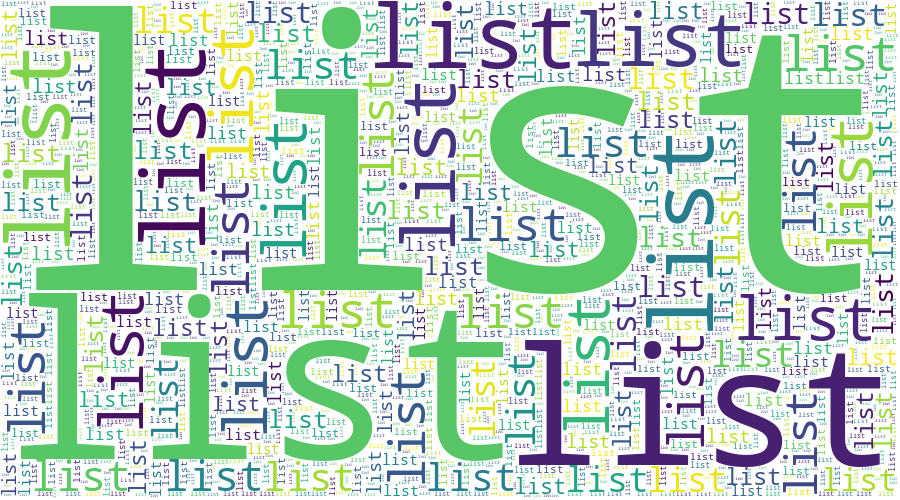

<Figure size 1200x640 with 0 Axes>

In [297]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
# Wordcloud for all tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df['clean_text'].values,"all.png")

Word Cloud Saved Successfully


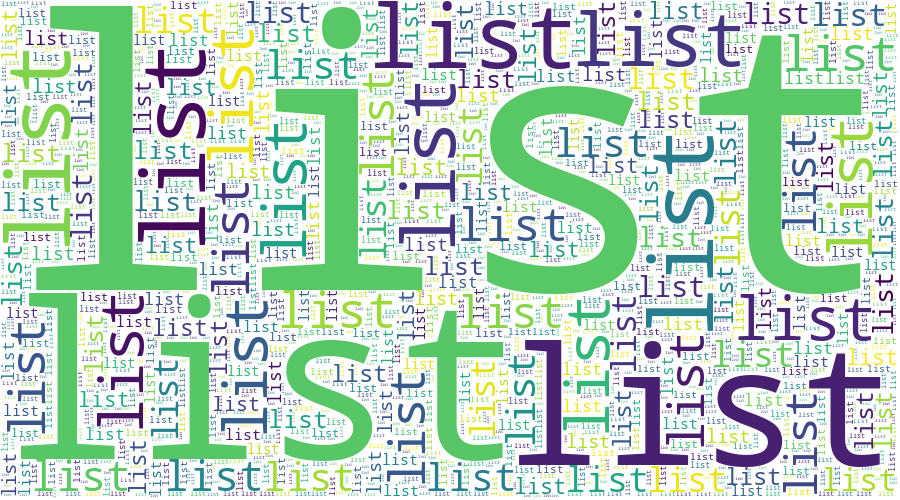

<Figure size 1200x640 with 0 Axes>

In [298]:
# Wordcloud for only positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_positive['clean_text'].values,"positive.png")

Word Cloud Saved Successfully


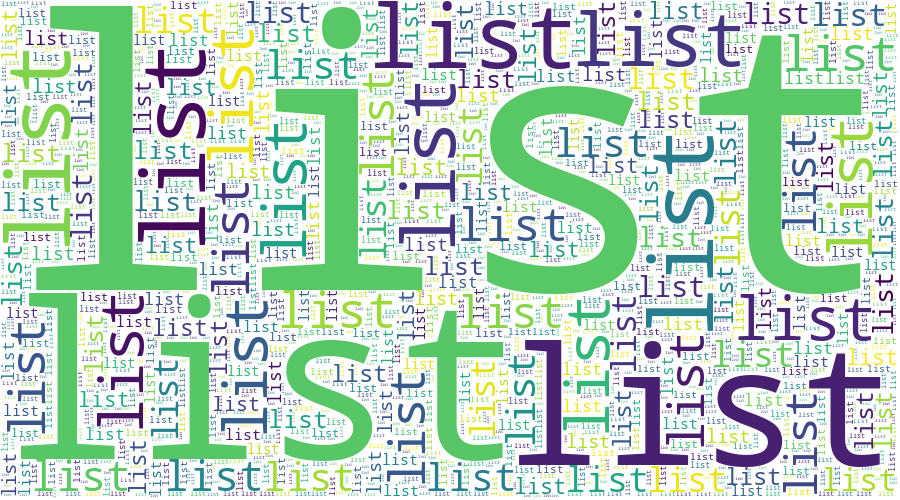

<Figure size 1200x640 with 0 Axes>

In [299]:
# Wordcloud for only negative tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_negative['clean_text'].values,"negative.png")

Word Cloud Saved Successfully


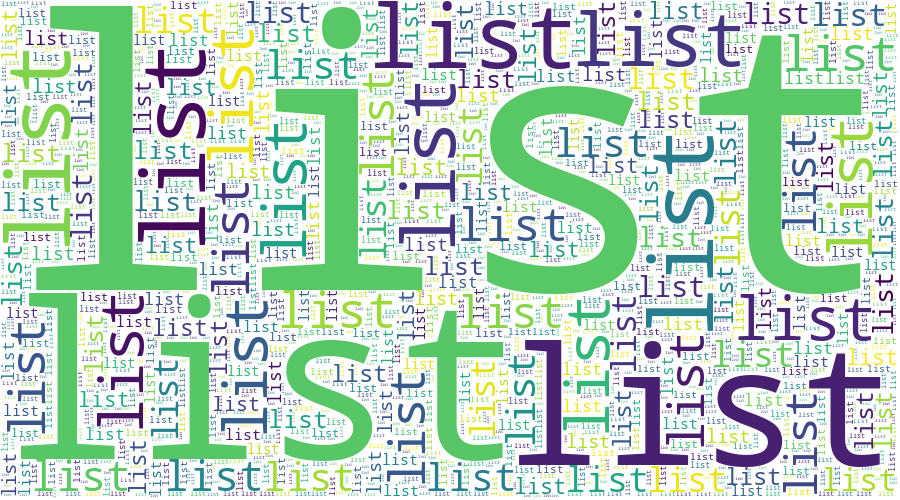

<Figure size 1200x640 with 0 Axes>

In [300]:
# Wordcloud for only neutral tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_neutral['clean_text'].values,"neutral.png")

#Tokenization 

In [43]:
'''def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(df,'tweet')'''

'def clean_text(df, field):\n    df[field] = df[field].str.replace(r"@"," at ")\n    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")\n    df[field] = df[field].str.replace(r"[^a-zA-Z(),"\'\n_]"," ")\n    df[field] = df[field].str.replace(r"http\\S+","")\n\n    return df\n\nclean_text(df,\'tweet\')'

In [44]:
'''stem = PorterStemmer()
df['clean_text'] = [stem.stem(word) for word in df['clean_text'] if not word in stopwords.words('english')]'''

"stem = PorterStemmer()\ndf['clean_text'] = [stem.stem(word) for word in df['clean_text'] if not word in stopwords.words('english')]"

In [172]:
 !pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 66.5 MB/s eta 0:00:00


In [173]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
# load model
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
# create pipeline
sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [264]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_text'])
df['clean_text'] = tokenizer.texts_to_sequences(df['clean_text'])
df['clean_text']

0         [42, 1, 307, 42492, 66, 1726, 42493, 1119, 40,...
1         [286, 16, 2, 1104, 3, 718, 16, 2, 809, 7, 38, ...
2         [24, 53, 41, 99, 38, 4, 1, 1003, 21, 508, 5, 5...
3         [383, 19, 496, 4730, 113, 43, 1221, 1, 53, 126...
4         [390, 22, 813, 79, 2, 173, 926, 127, 136, 124,...
                                ...                        
162975    [32, 79, 5172, 474, 570, 2429, 1, 6, 2715, 17,...
162976    [305, 363, 529, 13161, 10149, 24, 36, 1, 1195,...
162977        [53, 5, 1718, 234, 2583, 7526, 118, 191, 397]
162978    [63, 183, 558, 360, 192, 9, 1, 924, 558, 15, 6...
162979    [14, 5, 260, 686, 36, 26, 35329, 118, 4882, 10...
Name: clean_text, Length: 162969, dtype: object

In [265]:
df['category'].mask(df['category'] == 'negative',-1,  inplace=True)
df['category'].mask(df['category'] == 'neutral',0,  inplace=True)
df['category'].mask(df['category'] == 'positive',1,  inplace=True)
df['category']

0         -1
1          0
2          1
3          1
4          1
          ..
162975    -1
162976    -1
162977     0
162978     0
162979     1
Name: category, Length: 162969, dtype: object

In [266]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'],df['category'], test_size=0.2, random_state=40)


In [267]:
print('X_train:',len(X_train))
print('y_train:',len(y_train))
print('X_test:',len(X_test))
print('y_test:',len(y_test))

X_train: 130375
y_train: 130375
X_test: 32594
y_test: 32594


In [268]:
X_train = pad_sequences( X_train, maxlen=100 ,dtype='float32')
X_test = pad_sequences( X_test, maxlen=100 ,dtype='float32')

In [269]:
len(tokenizer.index_word)

113678

In [271]:
from tensorflow.keras.layers import Bidirectional
model_1 = Sequential()
model_1.add(Embedding(len(tokenizer.index_word)+1, input_length= 64 ,output_dim =50))
model_1.add(Bidirectional(LSTM(100)))
model_1.add(Flatten())
model_1.add(Dense(250, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile("adam", loss= 'binary_crossentropy' ,metrics=["accuracy"])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 64, 50)            5683950   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 250)               50250     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                      

In [272]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [273]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [276]:
history_1 = model_1.fit(X_train , y_train ,batch_size=64, epochs=7,
                    validation_data=(X_test , y_test),callbacks=[early_stop])

Epoch 1/7


ValueError: ignored

In [275]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

NameError: ignored

In [277]:
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, input_length= 64 ,output_dim =100))
model.add(LSTM(100))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile("adam", loss= 'categorical_crossentropy' ,metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 64, 100)           11367900  
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 128)               12928     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 11,461,615
Trainable params: 11,461,615
Non-trainable params: 0
_________________________________________________________________


In [278]:
history = model.fit(X_train , y_train ,batch_size=256, epochs=4,
                    validation_data=(X_test , y_test),callbacks=[early_stop])

Epoch 1/4


ValueError: ignored

In [279]:
results = model.evaluate(X_test, y_test, batch_size=64)

ValueError: ignored

#Feature extraction

#Classification

#Splitting the data

#Creating the Model

#Training the Model

#Evaluating Model

#Saving the Model